In [1]:
import librosa as rs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob

import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
path = "./*.csv"
files = glob.glob(path)
files

['.\\features.csv']

In [3]:
df = pd.read_csv(files[0])
df = df.set_index('id')
df

mean_amplitude       rms  pulse_count  std_pulse_dist  zero_count  \
id                                                                      
1          -190.46   7610.50           39            2.69      112261   
2             4.12   6018.91           24           33.06      136033   
3            21.13   8263.97           12           20.49      131483   
4           634.60  11511.00           54            5.53      148463   
5           845.03   2407.76           32           25.13       26552   
6           -27.43   6370.57           43            3.43       51180   
7           173.82  23165.73           60            3.13          50   
8          1326.57   7307.67           37            5.29       35655   
9          -853.58   8029.30           19           32.76      231976   
10          809.80  19379.09           46            6.82          32   
11           -7.26   2816.10           48            3.60      161790   
12          200.15  23168.45           58            4.32        1990   
13          254.86  11966.46           28           21.00      174074   
14          -56.36   6174.16           20            5.26      173300   
15           -0.08  11921.94           30            8.48         575   
16           -0.11  23963.50           37            5.42          70   
17          191.73  12020.13           40            6.19         790   
18           35.86   5927.31           24           19.06      183012   
19          102.42  11147.46           14           45.36       34505   
20          -62.92  11726.47           49            4.19      143915   
21           76.29  10401.82           36           12.05      161283   
22           20.61   6376.63           10           20.70      108406   
23           -1.98   7726.96           14           28.50       87048   
24           97.23  12977.37           58            4.49       92440   
25           48.05   6482.71           39            2.93      191628   
26          517.56  15927.46           67            2.42       90748   
27          375.13  10006.91           42           14.68      199128   
28          262.01  14349.58           51            2.82      157913   
29          -30.50  10139.27           36           10.97      208339   
30           28.71   7085.30           23           22.51      134924   
31          -28.62  12852.05           52            3.37          97   
32           75.58  30986.08           57            4.59        4957   

    mean_onset_strength  spectral_centroid  
id                                          
1                  2.37            6593.61  
2                  1.21            8903.30  
3                  1.32            6828.98  
4                  2.91            4994.30  
5                  0.13            7010.18  
6                  2.13            4158.46  
7                  0.48             189.64  
8                  0.43            3167.93  
9                  0.86            8823.24  
10                 0.74             310.60  
11                 1.40            6950.27  
12                 1.66             408.07  
13                 1.77            8507.81  
14                 0.55            7764.19  
15                 0.62             171.62  
16                 0.73             291.30  
17                 1.10             178.08  
18                 1.00            8567.91  
19                 1.37            2991.95  
20                 1.72            6261.81  
21                 1.33            7274.61  
22                 1.15            5542.11  
23                 1.18            4493.25  
24                 4.93            2430.80  
25                 2.48            5856.43  
26                 2.85            1815.98  
27                 2.40            7336.09  
28                 2.52            4570.21  
29                 1.30            8780.56  
30                 0.96            9458.39  
31                 2.13            1324.41  
32                 1.61            2

In [4]:
df.columns

Index(['mean_amplitude', 'rms', 'pulse_count', 'std_pulse_dist', 'zero_count',
       'mean_onset_strength', 'spectral_centroid'],
      dtype='object')

In [4]:
# # An "interface" to matplotlib.axes.Axes.hist() method
# n, bins, patches = plt.hist(x=df.iloc[:,3], bins='auto', color='#0504aa',
#                             alpha=0.7, rwidth=0.85)

In [6]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=1, svd_solver='arpack')
# pca.fit(df)
# print(pca.explained_variance_ratio_)

# x_new = pca.fit_transform(df)

In [40]:


np.random.seed(42)
y = np.zeros([32,1])
ids = np.random.choice(range(32), size=16, replace=False)
y[ids] = 1

# Assume X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state = 42)

In [41]:
ids

array([29, 15, 24, 17,  8,  9, 30, 25, 12,  0,  4, 16,  5, 13, 11, 23])

In [42]:
len(X_test)

10

In [43]:
np1_id = np.array(X_test.index)
np1_id.sort()
np1_id

array([ 1,  9, 10, 13, 16, 18, 25, 26, 30, 31], dtype=int64)

In [44]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y[X_train.index-1], test_size=0.5, random_state = 42)

In [45]:
np2_id = np.array(X_test2.index)
np2_id.sort()
np2_id

array([ 5, 11, 12, 14, 17, 19, 20, 21, 24, 27, 28], dtype=int64)

In [46]:
np3_id = np.array(X_train2.index)
np3_id.sort()
np3_id

array([ 2,  3,  4,  6,  7,  8, 15, 22, 23, 29, 32], dtype=int64)

In [47]:
# X_train.mean()

In [48]:
# X_test.mean()

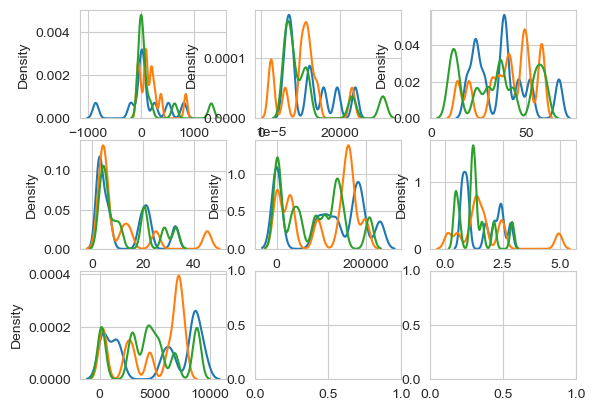

In [53]:
fig, axs = plt.subplots(3, 3)
for i,c in enumerate(X_test.columns):
    
    gp1 = X_test[c].values
    gp1.sort()
    
    gp2 = X_test2[c].values
    gp2.sort()
    
    gp3 = X_train2[c].values
    gp3.sort()
    
    plt.subplot(3,3,i+1)
    sns.set_style('whitegrid')
    
#     plt.bar(x=range(len(gp1)), height=gp1, )
#     plt.bar(x=range(len(gp2)), height=gp2, alpha = 0.5)
#     plt.bar(x=range(len(gp3)), height=gp3, alpha = 0.5)
    
    sns.kdeplot(gp1,bw_adjust=0.2)
    sns.kdeplot(gp2,bw_adjust=0.2)
    sns.kdeplot(gp3,bw_adjust=0.2)
    
    